# Simulated anneaing on TSP

# For Rajasthan Cities


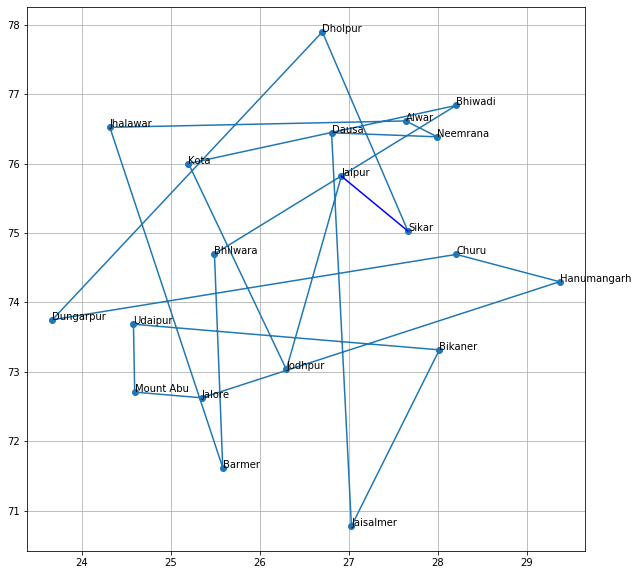


initially root cost: 6166.2126899740515
applying SA algorithm root cost reduced to : 2891.857198953367
applying SA algorithm root cost reduced to : 2719.6768717699056
applying SA algorithm root cost reduced to : 2719.6768717699056
applying SA algorithm root cost reduced to : 2719.6768717699056
applying SA algorithm root cost reduced to : 2719.6768717699056
applying SA algorithm root cost reduced to : 2719.6768717699056
applying SA algorithm root cost reduced to : 2719.6768717699056
applying SA algorithm root cost reduced to : 2719.6768717699056
applying SA algorithm root cost reduced to : 2719.6768717699056
applying SA algorithm root cost reduced to : 2719.6768717699056
applying SA algorithm root cost reduced to : 2719.6768717699056
applying SA algorithm root cost reduced to : 2719.6768717699056
applying SA algorithm root cost reduced to : 2719.6768717699056
applying SA algorithm root cost reduced to : 2719.6768717699056
applying SA algorithm root cost reduced to : 2719.6768717699056


In [3]:
import math,random
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="Raj")
Z = ['Jaipur','Jodhpur','Kota','Bhiwadi','Bhilwara','Barmer','Jhalawar','Alwar','Neemrana','Dausa','Jaisalmer','Bikaner','Udaipur','Mount Abu','Jalore','Hanumangarh','Churu','Dungarpur',
'Dholpur','Sikar']
X=[]
Y=[]
for i in range(len(Z)):
    
    location = geolocator.geocode(Z[i])
    X.extend([location.latitude])
    Y.extend([location.longitude])

# weight function, simple euclidean norm
def path_cost(X,Y):
    sum = 0
    size = len(X) -1
    for i in range(0,size):
        
        p1 = (X[i],Y[i])
        p2 =(X[i+1],Y[i+1])
        distance = geodesic(p1,p2).km
        sum+=distance
    p4=(X[0],Y[0])
    p3=(X[size],Y[size])    
    sum+= geodesic(p3,p4).km

    return sum   

def swap_coords(X,Y,Z,index_1,index_2):
    X[index_1],X[index_2] = X[index_2],X[index_1]
    Y[index_1],Y[index_2] = Y[index_2],Y[index_1]
    Z[index_1],Z[index_2] = Z[index_2],Z[index_1]
    


def swap_random(X,Y,Z):
    ran = len(X)-1
    pick_1 = random.randint(0,ran)
    pick_2 = random.randint(0,ran)

    X[pick_1],X[pick_2] = X[pick_2],X[pick_1]
    Y[pick_1],Y[pick_2] = Y[pick_2],Y[pick_1]
    Z[pick_1],Z[pick_2] = Z[pick_2],Z[pick_1]

    return pick_1, pick_2


N = 20

plt.figure(figsize=(10,10))
plt.grid()
plt.plot(X, Y, '-o')
for i, label in enumerate(Z):
    plt.text(X[i], Y[i],label)
    
x_values = [X[0], X[N-1]]
y_values = [Y[0], Y[N-1]]
plt.plot(x_values, y_values,'b')    
plt.show()

print("\ninitially root cost:",path_cost(X,Y))


best = path_cost(X,Y)
   
best_hist = []
T = 1.02
B = 0.999
max_accept = 10*N
t=0; iterations=1000; repeat=100
while t<repeat:
    n = 0
    accept=0
    while n <=iterations:
    
        index_1, index_2 = swap_random(X,Y,Z)
        curr = path_cost(X,Y)
        diff = (curr - best)
        if diff < 0 :
            accept+=1
            best = curr
            best_hist.append(best)
            
        elif math.exp(-(diff)/T) > random.uniform(0,1):
            accept+=1
            best_hist.append(curr)
            T *=B
        else:
            swap_coords(X,Y,Z,index_1,index_2)
        n += 1 
        if accept > max_accept: break
    t += 1
    T *= B
    print("applying SA algorithm root cost reduced to :",path_cost(X,Y))
    if accept == 0: break



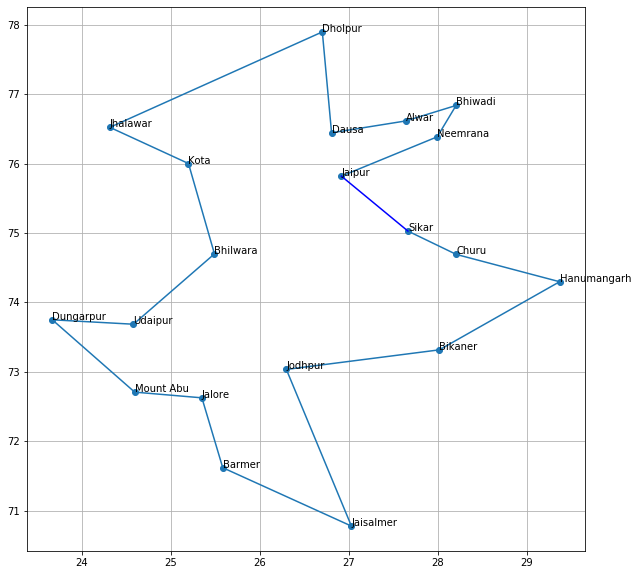

after applying SA algorithm root cost: 2719.6768717699056


In [5]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(X,Y,'-o',)
for i, label in enumerate(Z):
    plt.text(X[i], Y[i],label)
    
x_values = [X[0], X[N-1]]
y_values = [Y[0], Y[N-1]]
plt.plot(x_values, y_values,'b')    
plt.show()

print("after applying SA algorithm root cost:",path_cost(X,Y))

In [ ]:
plt.plot(best_hist)
plt.show()